SVM (Support Vector Machines) is a class of supervised models all leveraging the idea of minimizing some cost function by adjusting two vectors against some hyperplane and introduces an algorithm to quantify a level of separation between classes. SVM includes:
* SVC (Classifier)
* SVR (Regressor)
* [Ranking SVM](https://en.wikipedia.org/wiki/Ranking_SVM). 

All of them work **almost the same**, despite some slight differences in the loss. 

Before diving into the logic behind SVM it's important to introduce prerequisite math concepts:

#### Norm of a vector [$||X||$]
> Norm is the correct name for the **length of a vector**. To calculate it, the Euclidean norm is used: $||X||=\sqrt{\sum_i^N x_i^2}$

#### Unit vector [$\hat{X}$]
> Unit vector describes the relative **direction of a vector**. In the SVM problem the unit vector, that describes the direction, will be denoted as **W**. To calculate it we divide each feature by vector's norm: $\hat{X}=\frac{X}{||X||}$. **Norm** of $\hat{X}$ is always **equal to $1$**. 
>
> We can also calculate $\bar{X}$ using **$cos$**. If we have a vector of only two features $(x_1, x_2)$, then $cos(\beta)=\frac{x_1}{||x||}$ and $cos(\alpha)=\frac{x_2}{||x||}$. Therefore the unit vector will now be equal $\hat{X}=(cos(\beta), cos(\alpha))$ as seen in the picture:
> <p align="center"> <img src="./media/unit_vector_as_cos.png" alt="dot product"/> </p>

#### Dot product [$\cdot$]
> Dot product is a **scalar** (any real number $x\in\mathbb{R}$, which is named that way in order to just stress that it is just a number and not a vector or a matrix), defined by the following formula: $x\cdot y = ||x||\times||y||\times cos(\theta)$. It describes the **relation between vectors** as with the less angle between two ($\theta\rightarrow 0$) and less difference in directions, the higher is the dot product. It is also the only way vectors are **multiplied**:
> <p align="center"> <img src="./media/dot_product.png" alt="dot product"/> </p>
>
> The **algebraic formula** for the dot product, that is **used more commonly**, is: $x\cdot y = \sum_{i=0}^N (x_iy_i)$. Here's how it is derived:
> * From the definition of the unit vector we remember that each scalar can be represented as the measure of the angle. Therefore we can derive $\theta$ by subtracting angles (coordinates of unit vectors) from both sides, therefore $\theta=\alpha-\beta$ 
> * $$
    cos(\theta)=cos(\alpha-\beta)=cos(\alpha)cos(\beta)+sin(\alpha)sin(\beta)= \\
    =\frac{x_1}{||x||}\frac{y_1}{||y||} + \frac{x_2}{||x||}\frac{y_2}{||y||} = \\
    = \frac{x_1y_1+x_2y_2}{||x||\times||y||}
>    $$
> * Therefore, we derive the **algebraic formula**: $x\cdot y=\frac{x_1y_1+x_2y_2}{||x||\times||y||}\times ||x||\times||y|| = x_1y_1+x_2y_2$ 


#### Practically finding a distance between two hyperplanes
Given two parallel hyperplanes that we manipulate in SVM, one of the tasks is maximizing the distance between them. Since they cannot intersect each other (as they represent class borders), they are parellel. Suppose we are given some basis of 2-feature SVM problem: $Ax+By+C=0$. Therefore, given the formula for the distance between the point and the plane, we can calculate the distance between two parallel lines as $d=\frac{abs(C_2-C_1)}{\sqrt{A^2+B^2}}$. In SVM the difference between two of them is always $2$, so the distance can be simplified as $\frac{2}{||w||}$, where $\sqrt{A^2+B^2}$ is denoted as the length of vector $w$, which is also called "margin". `[reference 1]`

##### What exactly is $w$?
Rewriting the previous plane equation as $w^Tx+b=0$, where $w$ are coefficients for the plane will result into the main equation used in SVM. Therefore $||w||$ will be the square root of sum of squares of all possible coefficients from $w$, that make up for the plane that separates the data. Therefore the general equation for the SVM is as follows: 
$$
Y\left\{\begin{array}{l}
+1 \text { if } w^T x+b \geq 0 \\
-1 \text { if } w^T x+b<0, \text{where b is C from the original equation}
\end{array}\right.
$$

this hard-margin version of the SVM classifies any point above the plane as 1 and below it as 0. We will denote this equation as $BP=W^T\times X+b$ (stands for Basis Plane).

#### What is the optimization algorithm used in SVM?
We use the maximization algorithm for determining the position of the hyperplane, hence the name **support vector** machines. We rely on two "support parallel" vectors, and find the best set of coefficients that maximize the distance between them. However, since we rely on two arbitrary vectors, they need to be constrained in order to be between [-1; 1] range. Otherwise, the distance could be infinitely large. 

Having said that, the optimization algorithm is as follows: we must maximize the margin $\frac{2}{||w||}$ (or minimizing $||w||$) such that $BP\geq 1$ if $Y=1$ and $BP\leq -1$ if $Y=-1$. We can simplify the optimization function even further as $BP=Y\times(W^TX+b)\geq1$

##### How can we change the hyperplane if we encouter wrongly classified variables? How to implement this condition within the optimization algorithm?
We know that half a distance between support vectors (a distance from the basis plane to each of the support vectors) is $\frac{1}{||w||}$. Consider we get some missclassification, which resulted into the new distance of $\frac{\epsilon}{||w||}$. If there has been a misclassification, that would mean that $\epsilon>1$ from the basis plane. 

This is where soft margin comes into play, where the optimization function becomes $min(\frac{1}{2}||w||^2+C\times\sum\epsilon_i)$ ($||w||^2$ is done for computational purposes and $C$ is a hyperparameter). We also change the constraint to $Y\times(W^TX+b)\geq1-\epsilon_i$

##### What is the difference between soft margin and hard margin exactly?

In hard margin SVM we can see from the equation that we stop changing the position of the plane the moment we find the closest points to the $+1$ and $-1$ support vectors that satisfy the constraint.

In soft margin we are allowed to misclassify some points for the trade-off in how adaptive the model to new data could be, at the same time having an ability to penalize it for bigger differences in distances by tuning the $C$ parameter.

To see how to find the lagrangian and find its multipliers we could relate to this article: https://www.baeldung.com/cs/svm-hard-margin-vs-soft-margin

#### How should we go around cases when data is not linearly separable?
We employ kernel functions, that transform data into another, lower dimension, or apply some other linear transformation.
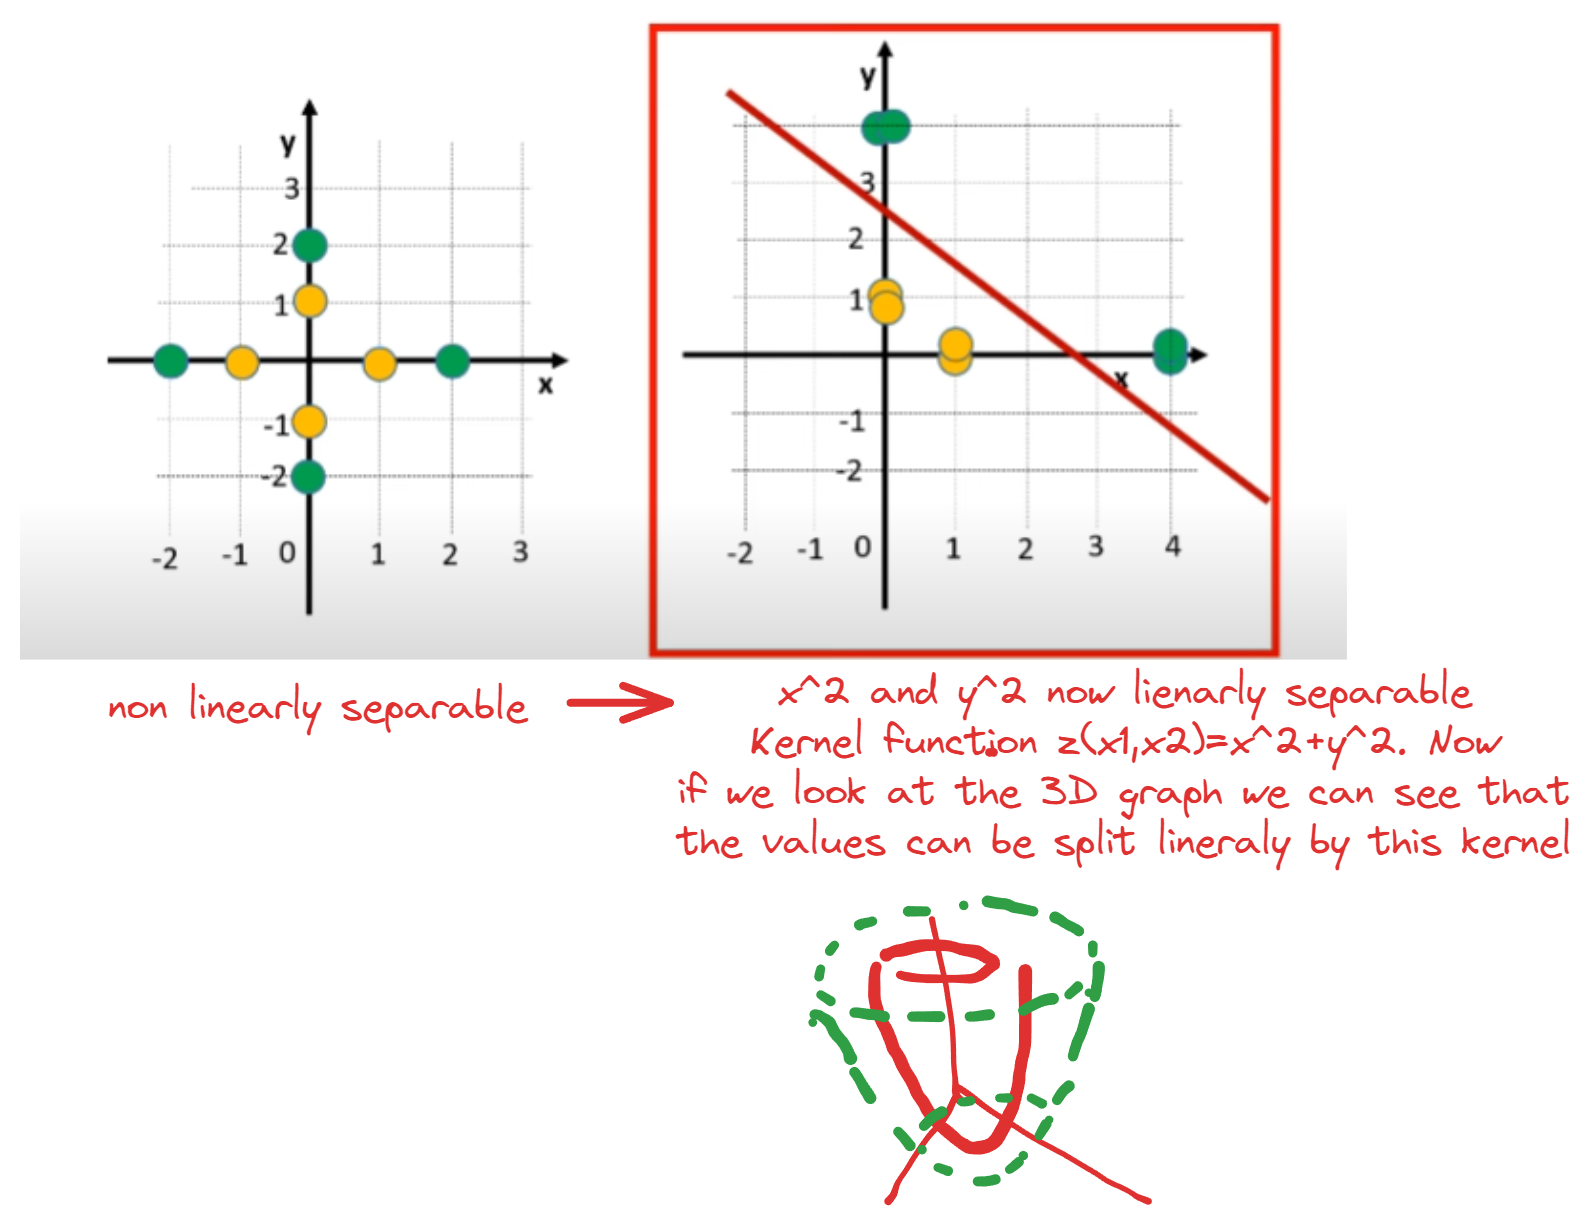

Text(0, 0.5, 'X2')

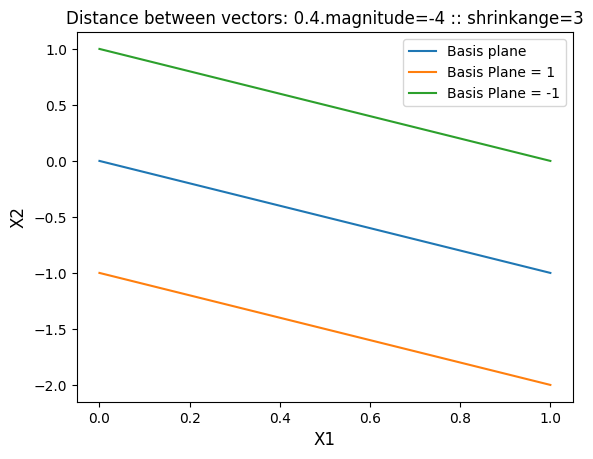

In [229]:
# REFERENCE 1

import matplotlib.pyplot as plt
import numpy as np

basisCoeff = np.random.randint(-4,4,(3,))
x1 = np.linspace(0,1,500) # x
x2 = np.linspace(0,1,500) # y
basisLine = x1 * basisCoeff[0] + x2 * basisCoeff[1] + basisCoeff[2]
supportVecLower = basisLine - 1
supportVecUpper = basisLine + 1
dist = 2 / (basisCoeff[0]**2+basisCoeff[1]**2)**.5
plt.plot(x1,basisLine,label='Basis plane')
plt.plot(x1,supportVecLower,label='Basis Plane = 1')
plt.plot(x1,supportVecUpper, label='Basis Plane = -1')
plt.legend(loc='best')
plt.title(f'Distance between vectors: {round(dist, 4)}.'\
        f'magnitude={basisCoeff[0]} :: shrinkange={basisCoeff[1]}')
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)

Since we're dealing with the dual problem (the constraint is defined by the unequality and thus can be approached from two sides) we'll be optimizing on the convex (shape where sum of angles is greater than 180deg). To recap, we have a constraint of $Y\times(W^TX+b)\geq1$ while minimizing the function $\frac{1}{2}||w||^2+C\times\sum\epsilon_i$. 

From the system of the equations from the gradient we can replace values in the original problem as $w=\Alpha YX$, where $\Alpha$ are lagrange multipliers and $\Alpha Y=0$. By substituting them in the second term of the Lagrangian function, we'll get the following dual problem: $max_\alpha -\frac{1}{2}\Alpha YX + $

In [ ]:
from kernels import rbf_kernel
from jaxopt import CvxpyQP

class SVM():
    def __init__(self, C=1, kernel=rbf_kernel, pow=4, gamma=None, coef=4) -> None:
        self.C = C
        self.kernel = kernel

        # used for kernel
        self.pow = pow
        self.gamma = gamma
        self.coef = coef

        self.lang_multipliers = None
        self.supportVecs = None
        self.supportVecLabels = None
        self.intercept = None

    def fit(self, X, y):
        N, D = X.shape

        if not self.gamma:
            self.gamma = 1/D
        
        self.kernel = self.kernel(
            pow=self.pow,
            gamma=self.gamma,
            coef=self.coef
        )

        # transform values to their linearly separable form
        Xtransformed = np.zeros((N,D))
        for i in range(N):
            for j in range(D):
                Xtransformed[i, j] = self.kernel(
                    x1=X[i],x2=X[j])

        # TODO